Gradient descent is an optimization algorithm used in machine learning and neural networks to find the minimum of a function, typically associated with the loss function in the context of training a model.

## Linear Regression with Graduent Decent


Develop a Multilayer Perceptron (MLP) model to investigate the effect of different learning rates.

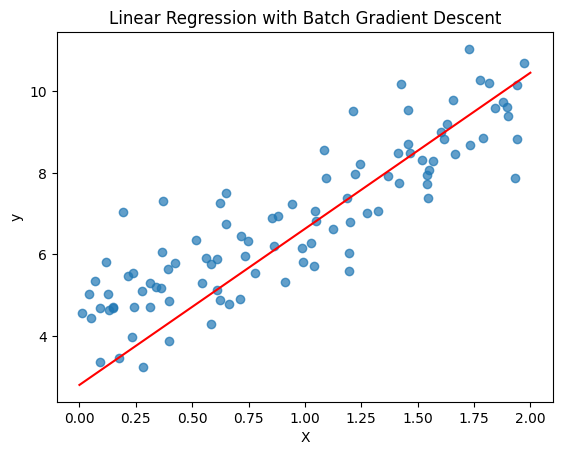

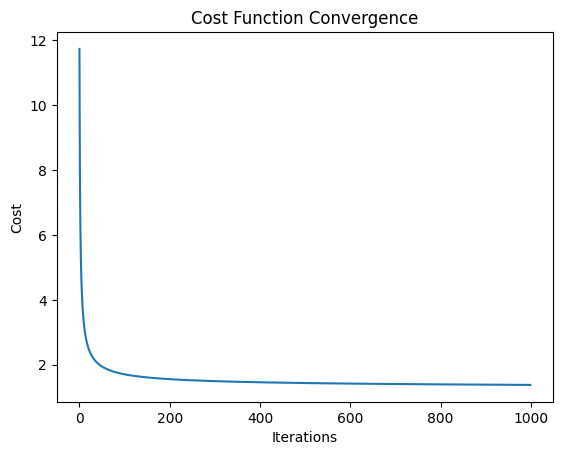

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data points with a linear relationship
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to the feature vector
X_b = np.c_[np.ones((100, 1)), X]

def batch_gradient_descent(X, y, learning_rate=0.1, n_iterations=1000, tol=1e-6):
    m = len(y)
    theta = np.random.randn(2, 1)  # Initialize random parameters
    cost_history = []

    for iteration in range(n_iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate / (iteration + 1) * gradients
        cost = np.mean((X.dot(theta) - y) ** 2)
        cost_history.append(cost)

        # Check for convergence
        if len(cost_history) > 1 and abs(cost_history[-1] - cost_history[-2]) < tol:
            break

    return theta, cost_history

# Run Batch Gradient Descent
theta, cost_history = batch_gradient_descent(X_b, y)

# Plot the data points
plt.scatter(X, y, alpha=0.7)

# Plot the fitted line
x_range = np.array([0, 2])
y_range = theta[0] + theta[1] * x_range
plt.plot(x_range, y_range, color='red')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Batch Gradient Descent')
plt.show()

# Plot the cost function over iterations
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()


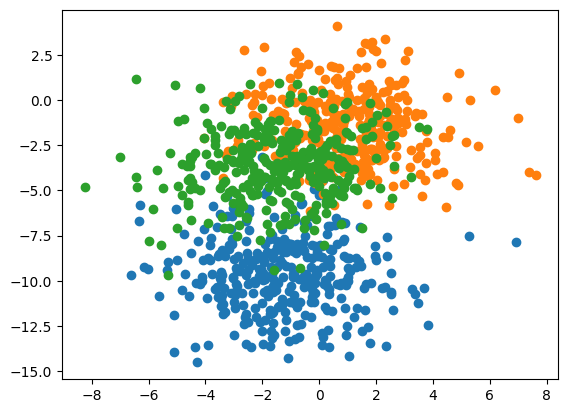

In [4]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
 # select indices of points with the class label
 row_ix = where(y == class_value)
 # scatter plot for points with a different color
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

Develop a Multilayer Perceptron (MLP) model to investigate the effect of different learning rates.

using scholastic graduent decent

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


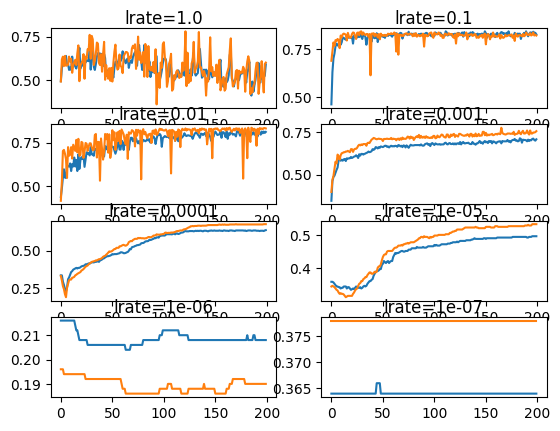

In [6]:
#study of learning rate on accuracy for blobs problem
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, lrate):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(lr=lrate)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
	# plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.title('lrate='+str(lrate), pad=-50)

# prepare dataset
trainX, trainy, testX, testy = prepare_data()
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(trainX, trainy, testX, testy, learning_rates[i])
# show learning curves
pyplot.show()

Example 2

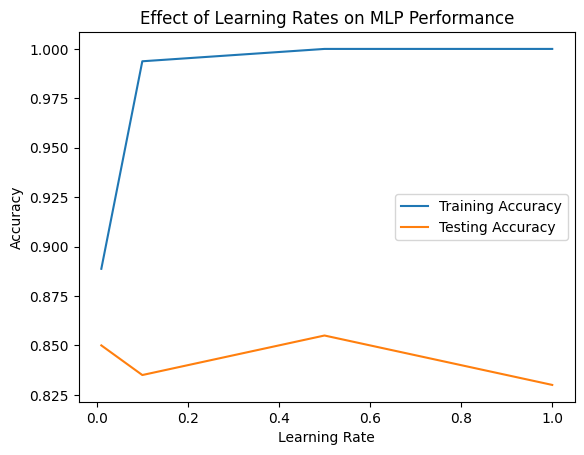

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

# Generate a 2-class classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create the MLP model
def create_mlp(learning_rate):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(20,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    optimizer = SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Different learning rates to investigate
learning_rates = [0.01, 0.1, 0.5, 1.0]

# Lists to store results
training_accuracies = []
testing_accuracies = []

# Train the MLP for each learning rate
for lr in learning_rates:
    mlp = create_mlp(learning_rate=lr)
    history = mlp.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    training_accuracies.append(history.history['accuracy'][-1])
    testing_accuracies.append(mlp.evaluate(X_test, y_test, verbose=0)[1])

# Plot the results
plt.plot(learning_rates, training_accuracies, label='Training Accuracy')
plt.plot(learning_rates, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rates on MLP Performance')
plt.legend()
plt.show()


more
https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

In [11]:
print(training_accuracies)
print(learning_rates)
print(testing_accuracies)

[0.8887500166893005, 0.9937499761581421, 1.0, 1.0]
[0.01, 0.1, 0.5, 1.0]
[0.8500000238418579, 0.8349999785423279, 0.8550000190734863, 0.8299999833106995]


Batch Gradient Descent to train a Multilayer Perceptron (MLP) model on the same synthetic classification dataset. We'll use Keras with TensorFlow backend to create the MLP model and apply Batch Gradient Descent by specifying a large batch size.

Epoch 1/500
4/4 [==============================] - 1s 7ms/step - loss: 0.6691 - accuracy: 0.5938
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5976 - accuracy: 0.7075
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5456 - accuracy: 0.7663
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5031 - accuracy: 0.7987
Epoch 5/500
4/4 [==============================] - 0s 5ms/step - loss: 0.4707 - accuracy: 0.8062
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 0.4427 - accuracy: 0.8400
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 0.4173 - accuracy: 0.8550
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3995 - accuracy: 0.8562
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3798 - accuracy: 0.8650
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 0.3639 - accuracy: 0.8675
Epoch 11/500
4/4 [===========

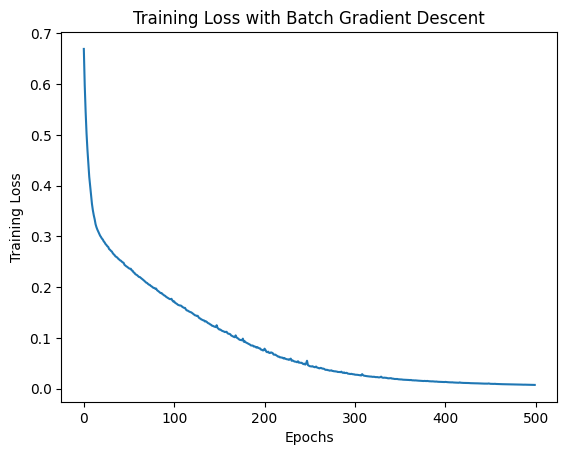

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

# Generate a 2-class classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create the MLP model
def create_mlp(learning_rate):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(20,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    optimizer = SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set the batch size for Batch Gradient Descent
batch_size = 256

# Batch Gradient Descent requires more epochs due to less frequent updates
epochs = 500

# Learning rate for Batch Gradient Descent
learning_rate = 0.1

# Create and train the MLP model with Batch Gradient Descent
mlp_batch = create_mlp(learning_rate=learning_rate)
history_batch = mlp_batch.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = mlp_batch.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Plot the training loss over epochs
plt.plot(history_batch.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss with Batch Gradient Descent')
plt.show()


Mini-batch Gradient Descent is a variation of Gradient Descent that uses smaller batches of data for each parameter update.

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.5911 - accuracy: 0.6850
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8462
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8700
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8800
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8875
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2845 - accuracy: 0.8938
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2722 - accuracy: 0.8938
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2649 - accuracy: 0.9000
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.9087
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2458 - accuracy: 0.9087
Epoch 11/

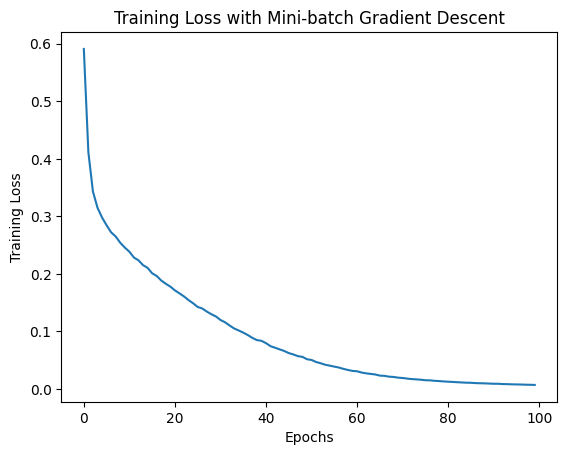

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

# Generate a 2-class classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create the MLP model
def create_mlp(learning_rate):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(20,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    optimizer = SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Set the batch size for Mini-batch Gradient Descent
batch_size = 32

# Learning rate for Mini-batch Gradient Descent
learning_rate = 0.1

# Create and train the MLP model with Mini-batch Gradient Descent
mlp_mini_batch = create_mlp(learning_rate=learning_rate)
history_mini_batch = mlp_mini_batch.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = mlp_mini_batch.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Plot the training loss over epochs
plt.plot(history_mini_batch.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss with Mini-batch Gradient Descent')
plt.show()


effects of different batch sizes for Batch Gradient Descent, Stochastic Gradient Descent (SGD).

7/7 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.8100
Test Accuracy - Batch Gradient Descent: 0.8450000286102295
Test Accuracy - Stochastic Gradient Descent: 0.8050000071525574
Test Accuracy - Mini-batch Gradient Descent: 0.8100000023841858


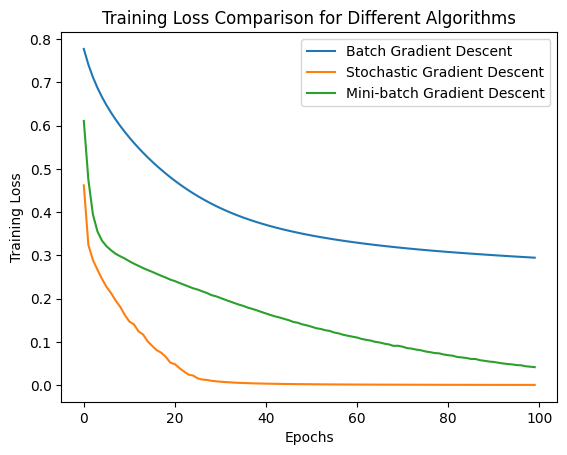

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

# Generate a 2-class classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create the MLP model
def create_mlp(learning_rate):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(20,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    optimizer = SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Learning rates for different algorithms
learning_rate_batch = 0.1
learning_rate_sgd = 0.01
learning_rate_mini_batch = 0.05

# Batch sizes for different algorithms
batch_size_batch = len(y_train)
batch_size_sgd = 1
batch_size_mini_batch = 32

# Create and train the MLP models for each algorithm
mlp_batch = create_mlp(learning_rate=learning_rate_batch)
history_batch = mlp_batch.fit(X_train, y_train, epochs=100, batch_size=batch_size_batch, verbose=0)

mlp_sgd = create_mlp(learning_rate=learning_rate_sgd)
history_sgd = mlp_sgd.fit(X_train, y_train, epochs=100, batch_size=batch_size_sgd, verbose=0)

mlp_mini_batch = create_mlp(learning_rate=learning_rate_mini_batch)
history_mini_batch = mlp_mini_batch.fit(X_train, y_train, epochs=100, batch_size=batch_size_mini_batch, verbose=0)

# Evaluate the models on test data
test_loss_batch, test_accuracy_batch = mlp_batch.evaluate(X_test, y_test)
test_loss_sgd, test_accuracy_sgd = mlp_sgd.evaluate(X_test, y_test)
test_loss_mini_batch, test_accuracy_mini_batch = mlp_mini_batch.evaluate(X_test, y_test)

print(f'Test Accuracy - Batch Gradient Descent: {test_accuracy_batch}')
print(f'Test Accuracy - Stochastic Gradient Descent: {test_accuracy_sgd}')
print(f'Test Accuracy - Mini-batch Gradient Descent: {test_accuracy_mini_batch}')

# Plot the training loss over epochs for each algorithm
plt.plot(history_batch.history['loss'], label='Batch Gradient Descent')
plt.plot(history_sgd.history['loss'], label='Stochastic Gradient Descent')
plt.plot(history_mini_batch.history['loss'], label='Mini-batch Gradient Descent')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Comparison for Different Algorithms')
plt.legend()
plt.show()


Find best hyperparameters for Stochastic Gradient Descent (SGD), y

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score

# Generate a 2-class classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Convert target variable y to binary format
y = y.reshape(-1, 1)

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Function to create the MLP model
def create_mlp(learning_rate, momentum, batch_size):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(20,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Use sigmoid activation for binary classification
    ])

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Grid search for learning rate, momentum, and batch size
learning_rates = [0.001, 0.01, 0.1]
momentums = [0.0, 0.5, 0.9]
batch_sizes = [16, 32, 64]

# Store the results in lists
results_lr = []
results_momentum = []
results_batch_size = []
results_accuracy = []

for lr in learning_rates:
    for momentum in momentums:
        for batch_size in batch_sizes:
            model = create_mlp(learning_rate=lr, momentum=momentum, batch_size=batch_size)
            model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=0, validation_data=(X_val, y_val))

            y_pred = model.predict(X_val)  # Use predict method for continuous output
            y_pred_binary = (y_pred > 0.5).astype(int)  # Apply threshold for binary predictions
            val_accuracy = accuracy_score(y_val, y_pred_binary)

            print(f'Learning Rate: {lr}, Momentum: {momentum}, Batch Size: {batch_size}, Validation Accuracy: {val_accuracy}')

            # Store the results in the lists
            results_lr.append(lr)
            results_momentum.append(momentum)
            results_batch_size.append(batch_size)
            results_accuracy.append(val_accuracy)

# Create a DataFrame from the results
results_df = pd.DataFrame({
    'Learning Rate': results_lr,
    'Momentum': results_momentum,
    'Batch Size': results_batch_size,
    'Validation Accuracy': results_accuracy
})

print(results_df)

# Find the row with the best accuracy
best_row = results_df.loc[results_df['Validation Accuracy'].idxmax()]
print("Best Hyperparameters:")
print(best_row)

# Now, train the final model with the best hyperparameters on the full training data
final_model = create_mlp(learning_rate=best_row['Learning Rate'],
                         momentum=best_row['Momentum'],
                         batch_size=int(best_row['Batch Size']))
final_model.fit(X_train, y_train, epochs=100, batch_size=int(best_row['Batch Size']), verbose=1)

# Evaluate the final model on the test data
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


5/5 [==============================] - 0s 4ms/step
Learning Rate: 0.001, Momentum: 0.0, Batch Size: 16, Validation Accuracy: 0.82
5/5 [==============================] - 0s 3ms/step
Learning Rate: 0.001, Momentum: 0.0, Batch Size: 32, Validation Accuracy: 0.82
5/5 [==============================] - 0s 2ms/step
Learning Rate: 0.001, Momentum: 0.0, Batch Size: 64, Validation Accuracy: 0.5866666666666667
5/5 [==============================] - 0s 4ms/step
Learning Rate: 0.001, Momentum: 0.5, Batch Size: 16, Validation Accuracy: 0.82
5/5 [==============================] - 0s 3ms/step
Learning Rate: 0.001, Momentum: 0.5, Batch Size: 32, Validation Accuracy: 0.8066666666666666
5/5 [==============================] - 0s 2ms/step
Learning Rate: 0.001, Momentum: 0.5, Batch Size: 64, Validation Accuracy: 0.7533333333333333
5/5 [==============================] - 0s 2ms/step
Learning Rate: 0.001, Momentum: 0.9, Batch Size: 16, Validation Accuracy: 0.8466666666666667
5/5 [=============================

In [22]:
# Sort the DataFrame by the 'Validation Accuracy' column in descending order
sorted_results_df = results_df.sort_values(by='Validation Accuracy', ascending=False)

# Print the sorted DataFrame
print(sorted_results_df)


    Learning Rate  Momentum  Batch Size  Validation Accuracy
13          0.010       0.5          32             0.873333
12          0.010       0.5          16             0.873333
24          0.100       0.9          16             0.873333
25          0.100       0.9          32             0.866667
21          0.100       0.5          16             0.866667
20          0.100       0.0          64             0.860000
7           0.001       0.9          32             0.860000
15          0.010       0.9          16             0.860000
18          0.100       0.0          16             0.853333
26          0.100       0.9          64             0.853333
6           0.001       0.9          16             0.846667
14          0.010       0.5          64             0.846667
23          0.100       0.5          64             0.846667
17          0.010       0.9          64             0.846667
10          0.010       0.0          32             0.840000
9           0.010       